<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x374 at 0x1CDB8A198E0>


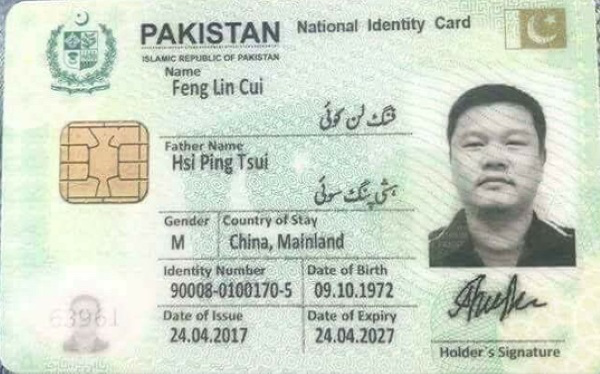

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x374 at 0x1CDB8BBB6D0>


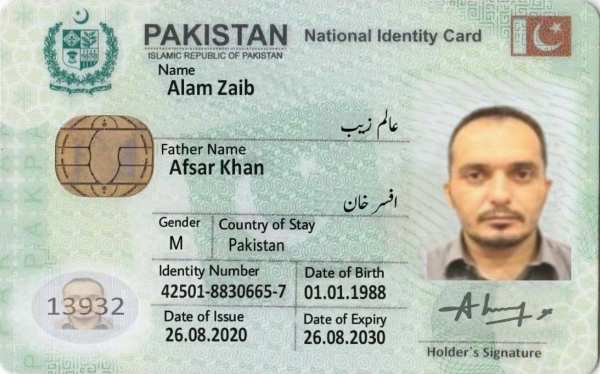

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x374 at 0x1CDB8BBB880>


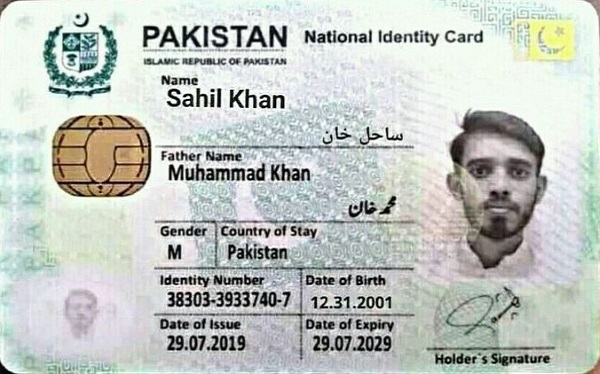

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x374 at 0x1CDB8BBB760>


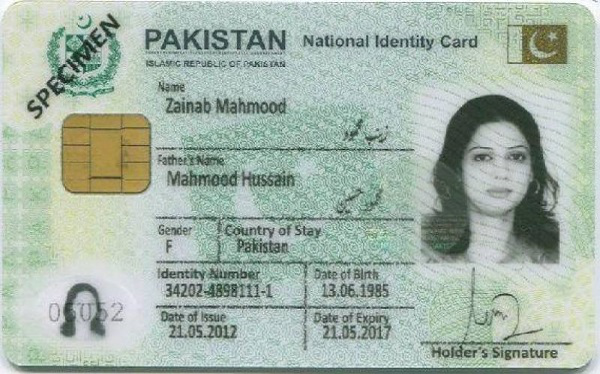

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x374 at 0x1CDB8BBB6D0>


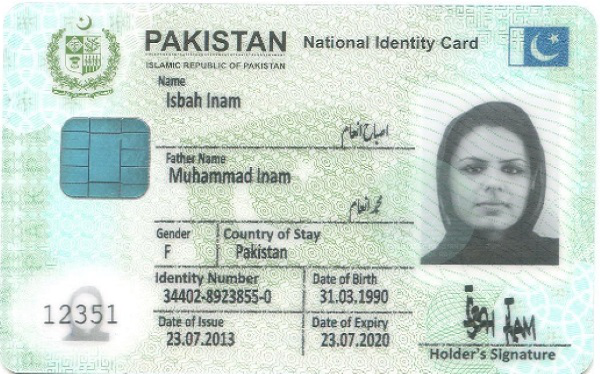

In [1]:
from PIL import Image
from IPython.display import display

image_paths = [
    "C:\\Users\\Shoaib\\Downloads\\CNIC_imgs\\c1.jpg",
    "C:\\Users\\Shoaib\\Downloads\\CNIC_imgs\\c2.jpg",
    "C:\\Users\\Shoaib\\Downloads\\CNIC_imgs\\c3.jpg",
    "C:\\Users\\Shoaib\\Downloads\\CNIC_imgs\\c4.jpg",
    "C:\\Users\\Shoaib\\Downloads\\CNIC_imgs\\c5.jpg",
    # Add more image paths as needed
]

for path in image_paths:
    try:
        img = Image.open(path)
        print(type(img))
        print(img)
        display(img)
    except FileNotFoundError:
        print("File not found:", path)


In [2]:
import os
from PIL import Image

input_folder = 'C:\\Users\\Shoaib\\Downloads\\CNIC_imgs'
output_folder = 'C:\\Users\\Shoaib\\Downloads\\new dataset'
resize_width = 600
resize_height = 370
crop_coords = (420, 280, 590, 340)

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all image files in the input folder
for filename in os.listdir(input_folder):
    # Check if the file is an image
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Load the image
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)
        
        # Resize the image
        resized_image = image.resize((resize_width, resize_height))
        
        # Crop the image
        cropped_image = resized_image.crop(crop_coords)
        
        # Generate the output file path
        output_path = os.path.join(output_folder, filename)
        
        # Save the cropped image
        cropped_image.save(output_path)
        
        print(f"Cropped image saved: {output_path}")


Cropped image saved: C:\Users\Shoaib\Downloads\new dataset\c1.jpg
Cropped image saved: C:\Users\Shoaib\Downloads\new dataset\c2.jpg
Cropped image saved: C:\Users\Shoaib\Downloads\new dataset\c3.jpg
Cropped image saved: C:\Users\Shoaib\Downloads\new dataset\c4.jpg
Cropped image saved: C:\Users\Shoaib\Downloads\new dataset\c5.jpg


# Create synthetic dataset

In [3]:
import os
import random
import numpy as np
from PIL import Image

# Specify the path to the images
image_folder = "C:\\Users\\Shoaib\\Downloads\\new dataset"

# Specify the output directory for augmented images
output_folder = 'C:\\Users\\Shoaib\\Downloads\\new dataset\\sig_dataset'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over each image in the folder
for filename in os.listdir(image_folder):
    # Check if the file is an image
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Load the image
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)

        # Convert the image to an array
        image_array = np.array(image)

        # Generate augmented images
        for i in range(5):
            # Generate random noise
            noise = np.random.normal(loc=0, scale=50, size=image_array.shape)

            # Add noise to the image
            noisy_image_array = image_array + noise
            noisy_image_array = np.clip(noisy_image_array, 0, 255).astype(np.uint8)

            # Convert the noisy image array back to an image
            noisy_image = Image.fromarray(noisy_image_array)

            # Save the noisy image
            noisy_filename = os.path.splitext(filename)[0] + f"_noise_{i+1}.jpg"
            noisy_image.save(os.path.join(output_folder, noisy_filename))


In [18]:
import os
import random
from PIL import ImageEnhance, Image

# Specify the path to the images
image_folder = "C:/Users/Hamza/SD_Visualization_ImgA/crop_imgs"

# Specify the output directory for augmented images
output_folder = 'C:/Users/Hamza/SD_Visualization_ImgA/crop_imgs/sig_dataset'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over each image in the folder
for filename in os.listdir(image_folder):
    # Check if the file is an image
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Load the image
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)

        # Generate augmented images
        for i in range(5):
            # Set a random brightness level
            brightness_factor = random.uniform(0.5, 1.5)

            # Apply brightness augmentation
            enhancer = ImageEnhance.Brightness(image)
            augmented_image = enhancer.enhance(brightness_factor)

            # Save the augmented image
            augmented_filename = os.path.splitext(filename)[0] + f"_brightness_{i+1}.jpg"
            augmented_image.save(os.path.join(output_folder, augmented_filename))
